# Projeto 1 - Ciência dos Dados

Nome: Leandra Fontes 

Nome: Luana Abramoff 

Nome: Tainá Bonfim 

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe


A economia brasileira 
------------

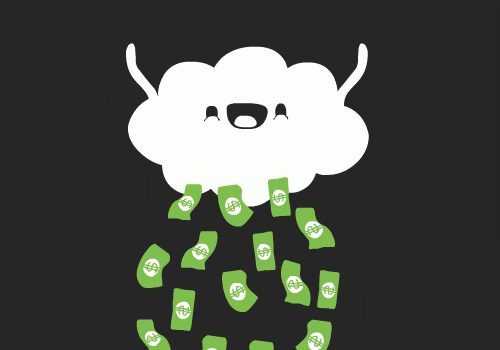

___
## Bibliotecas que serão utilizadas 


In [58]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import nltk 
import seaborn as sn

Confirmando o diretório

In [59]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\casa\Downloads


## Funções de Limpeza

In [60]:

def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[",!-.:?;çã'']' # Note que os sinais [] são delimitadores de um conjunto.
#     punctuation = '[!-.:?;]'
    pattern = re.compile(punctuation)
    
    text_subbed = re.sub(pattern, '', text)
    return text_subbed


In [61]:
def limpa_prep(texto): 
    lista=['a','e','é','i','o','u','ou','à', 'das','mas', 'ante', 'após', 'até', 'se','com', 'conta', 'de', 'desde', 'em', 'entre', 'para', 'per', 'perante', 'por', 
          'sem', 'sob', 'sobre', 'tras', 'na', 'no', 'as','os', 'que', 'um', 'uma', 'umas', 'da', 'do', 'o', 'as', 'pra','nas', 'nos', 'ao', 'seu', 'suas', 'seus', 'às']
    lista_frase=texto.split()
    result=[palavra for palavra in lista_frase if palavra.lower() not in lista ]
    retorno=' '.join(result)
    return retorno


In [62]:
def lower(texto): 
    return texto.lower()

In [63]:
#função para juntar as funções de limpeza
def junta (texto):
    text=cleanup(lower(texto))
    text2=limpa_prep(text)
    return  text2

In [64]:
#função para percorer uma coluna em um determinado DataFrame e juntar em um texto todas as palavras nela contida. 
def texto_inteiro(dataFrame): 
    teste=dataFrame.Clean.str.cat(sep=' ')
    new=teste.split()
    return new

## Banco de Dados

Carregando a base de dados com as notícias classificadas manualmente:

In [65]:
filename = 'dados.xlsx'

In [66]:
train = pd.read_excel(filename, sheet_name = 'Treinamento')
train.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Comprar ou vender?,Magazine Luiza (MGLU3) e Via (VIIA3) são os qu...,"Na última sexta-feira (25), o Governo Federal ...",02/03/2022 - 18:37,37.0,2.0,NaN,139.0,NaN
1,Economia,"Inflação argentina atinge 3,9% em janeiro, mai...","O Índice de Preços ao Consumidor (CPI, na sigl...",15/02/2022 - 16:56,88.0,1.0,NaN,NaN,NaN
2,Agro Times,"Preços do açúcar devem cair este ano, pequeno ...",O preço do açúcar bruto deve terminar este ano...,08/02/2022 - 11:05,113.0,1.0,NaN,NaN,NaN
3,Mercados,Bolsas europeias afundam após ataque russo à U...,As Bolsas europeias sofreram fortes quedas nes...,24/02/2022 - 8:11,58.0,0.0,NaN,NaN,NaN
4,Mercados,"Ibovespa abre em queda, com mercado monitorand...",O Ibovespa (IBOV) abriu esta sexta-feira (4) e...,04/03/2022 - 10:11,28.0,1.0,NaN,NaN,NaN


In [67]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Agro Times,Importações de frango pela China devem aumenta...,As importações chinesas de carne de frango dev...,04/02/2022 - 10:00,123,2.0,NaN,125.0,NaN,NaN,NaN,NaN
1,Agro Times,Decreto presidencial aumenta número de adidos ...,O presidente Jair Bolsonaro editou decreto que...,14/02/2022 - 8:39,96,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Economia,"Brasil terá déficit primário de 1,6% do PIB em...",A agência de classificação de risco Moody’s pr...,07/02/2022 - 11:29,117,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Empresas,Ações da Oi (OIBR3) afundam com três conselhei...,As ações da Oi afundam em um momento em que o ...,09/02/2022 - 13:38,107,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Economia,Brasil tem R$ 828 bi de investimentos contrata...,"O ministro da Economia, Paulo Guedes, afirmou ...",10/02/2022 - 18:47,102,2.0,NaN,NaN,NaN,NaN,NaN,NaN


___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação das notícias (Target).

Contextualização:A palavra escolhida para a classificação foi "Economia".

A classificação por meio de targets foi feita com o intuito de analisar impactos na economia do Brasil, onde esses impactos foram classificados como positivos (target 2), caso tivesse alguma notícia que remetesse a um aumento na economia do Brasil como, uma startup que fosse fundada no Brasil e gerasse renda, preço da gasolina diminuísse,dentre outros.Já para notícias que tratavam de impactos como, aumento do preço da gasolina, desemprego, dentre outros,classificamos como impactos negativos (target 1). Já para notícias que tratavam de falas sobre decretos do presidente Jair Bolsonaro, notícias sobre a economia da rússia,dentre outras, foram classificadas como neutras (target 0). 





## Limpezas utilizadas
O primeiro passo será realizar a limpeza das notícias obtidas para que que assim o classificador possua palavras substancialmente relevantes para utilizar em sua classificação.

* Função Clenaup: Irá remover itens de potuação como: "?", "!". 
* Função limpa_prep: Irá realizar a limpeza de preposições, vogais e palavras não tão importantes para a cosntrução de uma notícia.
* Função Lower: Irá deixar qualquer entrada de string com letras minúsculas
* Função Junta: Irá realizar a concatenação das funções anteriores 

In [68]:
train['PrimeiroParag'] = train['PrimeiroParag'].astype('str')
test['PrimeiroParag'] = test['PrimeiroParag'].astype('str')

In [69]:
classe0=test.loc[test['Target']==0.0,:].PrimeiroParag.str.cat(sep=' ')
classe1=test.loc[test['Target']==1.0,:].PrimeiroParag.str.cat(sep=' ')
classe2=test.loc[test['Target']==2.0,:].PrimeiroParag.str.cat(sep=' ')


In [70]:
limpeza0 = limpa_prep(cleanup(classe0.lower()))
limpeza1 = limpa_prep(cleanup(classe1.lower()))
limpeza2 = limpa_prep(cleanup(classe2.lower()))


___
### Montando um Classificador Naive-Bayes


Nessa etapa foi definido os parâmetros necessários para o modelo, além da definição da target que foram classificados como postivo, negativo ou netros em assuntos relacionados a economia.

 
Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

___
### Teorema de Bayes 

<p> O teorema de Bayes é um artifício matemático utilizado em cálculos envolvidos em estimativas probabilísticas que a partir de sua fórmula possibilita a classificação de dados. Tal método deve ser “alimentado” a priori com informações anteriores ao que se deseja obter com o teorema. Sendo assim, naive Bayes será a ferramenta pela qual classificaremos se a notícia tende a ser negativa, positiva, ou neutra, no que tange a impactos na economia brasileira.  </p>

### Cálculos de probabilidade: 

P(positivo) - probabilidade de ser positivo  
P(negativo)-  probabilidade de ser negativo 
P(neutro)- probabilidade de ser neutro
P(1° Parágrafo)- pŕobabilidade da ocorrência do primeiro parágrafo 

 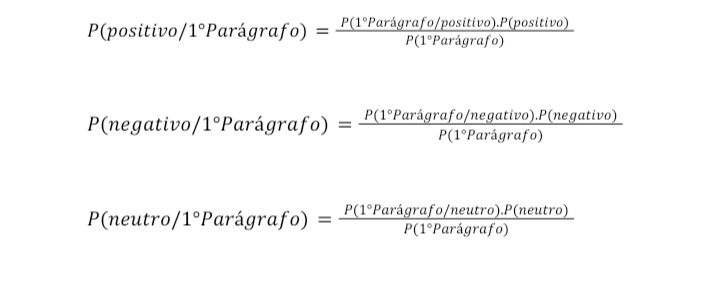



As três probabilidades apresentadas acima são utilizadas pelo classificador Naive Bayes para julgar a notícia como positiva, negativa ou neutra.



In [71]:
# Quebrando o texto em palavras
todas_palavras0 = limpeza0.split()

# Guardando as palavras como um pd.Series
serie_palavra0 = pd.Series(todas_palavras0)

##Encontrando a frequência absoluta das palavras
tabela_palavra0 = serie_palavra0.value_counts()
tabela_palavra0

#encontrando a frequência relativa das palavras 
tabela_palavra0_relativa = serie_palavra0.value_counts(True)
tabela_palavra0_relativa

tabela_palavra0_relativa.sum()

tabela_palavra0_relativa["brasil"]

0.0008068854222700376

In [72]:
# Quebrando o texto em palavras
todas_palavras1 = limpeza1.split()

# Guardando as palavras como um pd.Series
serie_palavra1 = pd.Series(todas_palavras1)

#Encontrando a frequência absoluta das palavras
tabela_palavra1 = serie_palavra1.value_counts()
tabela_palavra1

#encontrando a frequência relativa das palavras 
tabela_palavra1_relativa = serie_palavra1.value_counts(True)
tabela_palavra1_relativa.sum()

tabela_palavra1_relativa["brasil"]



0.007879656160458453

In [73]:
# Quebrando o texto em palavras
todas_palavras2= limpeza2.split()

# Guardando as palavras como um pd.Series
serie_palavra2 = pd.Series(todas_palavras2)

##Encontrando a frequência absoluta das palavras
tabela_palavra2 = serie_palavra2.value_counts()
tabela_palavra2

#encontrando a frequência relativa das palavras 
tabela_palavra2_relativa = serie_palavra2.value_counts(True)
tabela_palavra2_relativa

tabela_palavra2_relativa.sum()

tabela_palavra2_relativa["brasil"]

0.007944389275074478

In [74]:
#Juntando todas as palavras em um texto só
junta_tudo=limpeza0 + limpeza1 + limpeza2

In [75]:
todas_palavras_junta_tudo=junta_tudo.split()
serie_junta_tudo=pd.Series(todas_palavras_junta_tudo)
serie_junta_tudo

0          presidente
1                jair
2           bolsonaro
3              editou
4             decreto
5             aumenta
6                  28
7                  29
8               total
9              adidos
10          agrícolas
11      representaões
12       diplomáticas
13           exterior
14             deciso
15               está
16          publicada
17             diário
18            oficial
19               unio
20                dou
21              desta
22       segundafeira
23                 14
24                 “a
25             medida
26         representa
27              criao
28         automática
29          adidância
            ...      
9499           imagem
9500          foguete
9501          caberia
9502            muito
9503              bem
9504           afinal
9505       petroleira
9506     literalmente
9507        “decolou”
9508         operando
9509           baixas
9510            altas
9511     praticamente
9512            sesso
9513      

In [76]:
#Probabilidade do todo
# frase=test.loc[test['PrimeiroParag']==1,:]
# frase
frase=test.PrimeiroParag.loc[0]
frase = cleanup(frase.lower())
frase.split()
print(frase)
test

as importaões chinesas de carne de frango devem somar 800 mil toneladas em 2022 um aumento de 2 ante 2021 de acordo com relatório do adido do departamento de agricultura dos estados unidos usda em pequim a estimativa no inclui pés de frango o adido disse que a projeo reflete uma reduo esperada na produo doméstica


,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Agro Times,Importações de frango pela China devem aumenta...,As importações chinesas de carne de frango dev...,04/02/2022 - 10:00,123,2.0,NaN,125.0,NaN,NaN,NaN,NaN
1,Agro Times,Decreto presidencial aumenta número de adidos ...,O presidente Jair Bolsonaro editou decreto que...,14/02/2022 - 8:39,96,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Economia,"Brasil terá déficit primário de 1,6% do PIB em...",A agência de classificação de risco Moody’s pr...,07/02/2022 - 11:29,117,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Empresas,Ações da Oi (OIBR3) afundam com três conselhei...,As ações da Oi afundam em um momento em que o ...,09/02/2022 - 13:38,107,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Economia,Brasil tem R$ 828 bi de investimentos contrata...,"O ministro da Economia, Paulo Guedes, afirmou ...",10/02/2022 - 18:47,102,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Bancos,"Mester, do Fed, diz que “série” de altas de ju...",O banco central dos Estados Unidos (Fed) preci...,24/02/2022 - 16:09,55,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Regulamentação cripto,Rússia: Autoridades deverão reconhecer criptoa...,Autoridades da Rússia estão prontas para recon...,09/02/2022 - 8:21,109,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Política,"Para Bolsonaro, alta nos combustíveis levará m...",O presidente Jair Bolsonaro disse nesta quinta...,10/03/2022 - 20:40,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Internacional,Crescimento industrial da zona do euro perde í...,O embalo do crescimento industrial da zona do ...,01/03/2022 - 12:23,43,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Agro Times,Fertilizantes: interrupção de exportação da Rú...,A interrupção do fluxo de exportação de fertil...,03/03/2022 - 8:45,35,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
print(len(serie_palavra0))
prob0=len(serie_palavra0)/len(serie_junta_tudo)
print('A probabilidade de ser da target 0 é de {:.5f}'.format(prob0))
test.Target.value_counts(True)

3718
A probabilidade de ser da target 0 é de 0.39018


0.0    0.397985
2.0    0.314861
1.0    0.287154
Name: Target, dtype: float64

In [78]:
print(len(serie_palavra1))
prob1=len(serie_palavra1)/len(serie_junta_tudo)
print('A probabilidade de ser da target 1 é de {:.5f}'.format(prob1))
test.Target.value_counts(True)

2792
A probabilidade de ser da target 1 é de 0.29300


0.0    0.397985
2.0    0.314861
1.0    0.287154
Name: Target, dtype: float64

In [79]:
print(len(serie_palavra2))
prob2=len(serie_palavra2)/len(serie_junta_tudo)
print('A probabilidade de ser da target 2 é de {:.5f}'.format(prob2))
test.Target.value_counts(True)

3021
A probabilidade de ser da target 2 é de 0.31703


0.0    0.397985
2.0    0.314861
1.0    0.287154
Name: Target, dtype: float64

### Suavização de La Place

A Suavização de Laplace tem como função tratar as palavras que não estão incluídas na base de dados, ou seja estão fora do conjunto universo,  o que retornaria o valor zero na multiplicação das probabilidades. Uma vez que, esse problema se apresenta, tal método busca adicionar tal palavra no âmbito das frequências absolutas, pela adição de 1 a contagem de quantas vezes uma dita palavra apareceu dividida pelas palavras totais acrescidas de todas as palavras possíveis no denominador. 

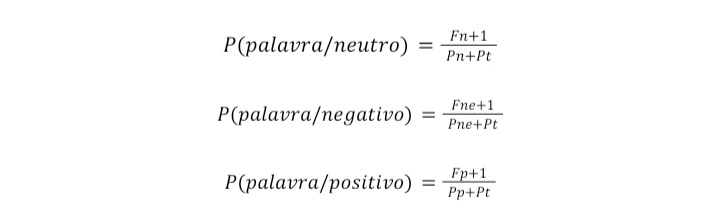

Pn são todas as palavras pertencentes as frases rotuladas como neutro
Pne são todas as palavras pertencentes as frases rotuladas como negativo
Pp são todas as palavras pertencentes as frases rotuladas como positivo
Pt são todas as palavras pertencentes a base de dados teste 
Fn é a frequência absoluta da palavra na categoria neutro 
Fne é a frequência absoluta da palavra na categoria negativo 
Fp é a frequência absoluta da palavra na categoria positivo 




___
<h3>Verificando a performance do Classificador </h3> 

Agora você deve testar o seu classificador com a base de Testes.


In [80]:
#Aqui fazemos um teste da função classificadora para uma frase e depois aplicaremos essa função ao longo de toda tabela 


def classificadorteste(text):
    
    text = str(text)
    frase = junta(text)
    palavras = frase.split()
    #Total de palavras de cada target 
    totaldepalavras1 = tabela_palavra1.sum()
    totaldepalavras2 = tabela_palavra2.sum()
    totaldepalavras0 = tabela_palavra0.sum()

    #Total de palavras diferentes 
    totaldepalavrasdiferentes =serie_junta_tudo.value_counts().count()

    valor1 =1
    valor2 =1
    valor0 =1
    
    #Aplicação da Suavização de La Place
    for palavra in palavras:
        if palavra in tabela_palavra1:
            valor = (tabela_palavra1[palavra] + 1)/(totaldepalavras1 + totaldepalavrasdiferentes)
            valor1*=valor
        else:
            valor = (1)/(totaldepalavras1 + totaldepalavrasdiferentes)
            valor1*=valor
        if palavra in tabela_palavra2:
            valor = (tabela_palavra2[palavra] + 1)/(totaldepalavras2 + totaldepalavrasdiferentes)
            valor2*=valor
        else:
            valor = (1)/(totaldepalavras2 + totaldepalavrasdiferentes)
            valor2*=valor
        if palavra in tabela_palavra0:
            valor = (tabela_palavra0[palavra] + 1)/(totaldepalavras0 + totaldepalavrasdiferentes)
            valor0*=valor
        else:
            valor = (1)/(totaldepalavras0 + totaldepalavrasdiferentes)
            valor0*=valor
    #faz uma lista com os valores e irá retornar a maior 
    lista = [valor1,valor2,valor0]
    maior = max(lista)
    if maior == valor1:
        teste=1.0     
    if maior == valor2:
        teste=2.0
    if maior == valor0:
        teste=0.0
    float(teste)
    return teste

In [81]:
palavras = frase.split()

print(classificadorteste(palavras))


2.0


In [82]:
listafinal = [] #Lista que vai se tornar a coluna Target_Robo
#Fazendo for em todos os primeiros parágrafos da tabela Teste
for frase in test.PrimeiroParag:
    frase = str(frase)
    frase = cleanup(frase.lower())
    palavras = frase.split()
    
    #Total de palavras de cada target 
    totaldepalavras1 = tabela_palavra1.sum()
    totaldepalavras2 = tabela_palavra2.sum()
    totaldepalavras0 = tabela_palavra0.sum()

    #Total de palavras diferentes
    totaldepalavrasdiferentes =serie_junta_tudo.value_counts().count()

    #Valor base para as porcentagens 
    valor1 =1
    valor2 =1
    valor0 =1
    target=""
    #Aplicação do La Place 
    for palavra in palavras:
        if palavra in tabela_palavra1:
            valor = (tabela_palavra1[palavra] + 1)/(totaldepalavras1 + totaldepalavrasdiferentes)
            valor1*=valor
        else:
            valor = (1)/(totaldepalavras1 + totaldepalavrasdiferentes)
            valor1*=valor
        if palavra in tabela_palavra2:
            valor = (tabela_palavra2[palavra] + 1)/(totaldepalavras2 + totaldepalavrasdiferentes)
            valor2*=valor
        else:
            valor = (1)/(totaldepalavras2 + totaldepalavrasdiferentes)
            valor2*=valor
        if palavra in tabela_palavra0:
            valor = (tabela_palavra0[palavra] + 1)/(totaldepalavras0 + totaldepalavrasdiferentes)
            valor0*=valor
        else:
            valor = (1)/(totaldepalavras0 + totaldepalavrasdiferentes)
            valor0*=valor
    #Classficador comparando qual é o maior valor e definindo o target e adicionando na lista que irá gerar a tebal robô     
    lista = [valor1,valor2,valor0]
    maior = max(lista)
    if maior == valor1:
            listafinal.append("1.0")
    if maior == valor2:
            listafinal.append("2.0")
    if maior == valor0:
            listafinal.append("0.0")
listafinal

test['Target_Robo'] = listafinal

In [83]:
test= test[['PrimeiroParag','Target', "Target_Robo"]]
test

,PrimeiroParag,Target,Target_Robo
0,As importações chinesas de carne de frango dev...,2.0,2.0
1,O presidente Jair Bolsonaro editou decreto que...,0.0,0.0
2,A agência de classificação de risco Moody’s pr...,1.0,1.0
3,As ações da Oi afundam em um momento em que o ...,1.0,1.0
4,"O ministro da Economia, Paulo Guedes, afirmou ...",2.0,2.0
5,O banco central dos Estados Unidos (Fed) preci...,1.0,1.0
6,Autoridades da Rússia estão prontas para recon...,0.0,0.0
7,O presidente Jair Bolsonaro disse nesta quinta...,1.0,1.0
8,O embalo do crescimento industrial da zona do ...,0.0,0.0
9,A interrupção do fluxo de exportação de fertil...,1.0,1.0


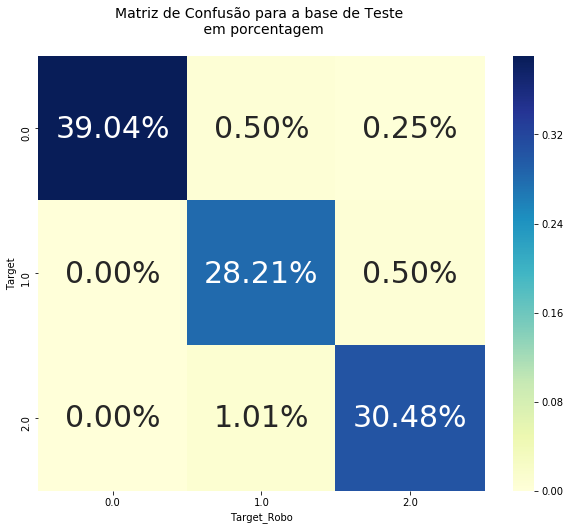

In [84]:
verifica = pd.crosstab(test.Target, test.Target_Robo, normalize=True)
plt.figure(figsize = (10,8))
plt.title('Matriz de Confusão para a base de Teste \n em porcentagem\n',fontdict={'fontsize': 14})
sn.heatmap(verifica, annot=True, annot_kws={"size":30},fmt='.2%',cmap='YlGnBu')

___
## Concluindo

<font size="+1">
    
<p> Apartir da matriz de confusão,gerada por meio do classificador, é possível observar a acurácia desse modelo probabilístico, que foi de 97.73%, ou seja,um excelente desempenho quando comparado com a base de dados classificada de forma manual. </p>

<p> Dessa forma,a eficácia do classificador pode ser explicada pelo fato de ter sido utilizado parágrafos para a classificação, não se atendo apenas a probabilidade independente de cada palavra, o que faz com que o sentido da frase seja analisado e gere uma eficácia maior. </p>

<p> No entanto, os outros 2,27% que não corresponderam a classificação manual, correspondem, em parte, aos falsos positivos (1.01%),que correspondem as notícias que foram classificados manualmente como positivos, mas que na verdade é composto por (0.00%) neutro + (1.01%) negativo , aos falsos negativos (0.50%), que correspondem as notícias que foram classificados manualmente como negativos, mas que na verdade é composto por (0.00%) neutro + (0.50%) positivo e aos falsos neutros (0.75%), que correspondem as notícias que foram classificadas manualmente como neutras, mas que na verdade é composto por (0.50%) negativo + (0.25%) positivo. </p>


### Melhorias para implementações futuras
​
​
​
### Stemming e lemmatization:
<font size="+1">
Stemming consiste em um processo que corta as extremidades das palavras , ou seja, transforma a palavra no seu radical. Já a lemmatization consiste em agrupar diferentes flexões de uma mesma palavra. Um exemplo disso seria remarcações, remarcação, remarcado, dentre outros. Já que, o que se quer analisar aqui é o número de aparições de uma mesma palavra.
​
Para ler mais, acesse o link abaixo:
    
https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html#:~:text=Lemmatization%20usually%20refers%20to%20doing,is%20known%20as%20the%20lemma%20.
​

​
### Usando TF-IDF:
​
 <font size="+1">
Segundo o artigo,ele aumenta o número de vezes que uma palavra aparece em um documento , mas é compensado pelo número de documentos que contêm a palavra. Assim, palavras que aparecem em todos os documentos, mas que não tem relevância, possuem classificações baixas, como preposições e pequenas frases tais como: "como este". Já para palavras que aparecem com frequência em um só documento, é provável que seja relevante.
​
Para ler mais, acesse o link abaixo:
    
https://monkeylearn.com/blog/what-is-tf-idf/







___
### Qualidade do Classificador a partir de novas separações das notícias entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [85]:
# Juntando as duas tabelas (Test + Train)
test_nova = pd.read_excel(filename, sheet_name = 'Teste')
test_nova = test_nova.rename(columns={'Teste':'Total'})

train_nova = pd.read_excel(filename, sheet_name = 'Treinamento')
train_nova = train_nova.rename(columns={'Treinamento':'Total'})

# Junção das duas tabelas ocorre aqui
tudo = pd.concat([train_nova,test_nova])  #criação de um novo DataFrame 
tudo['PrimeiroParag'] = tudo['PrimeiroParag'].astype('str')
tudo['Clean']=tudo['PrimeiroParag'].apply(junta)
tudo = tudo[['PrimeiroParag','Target', "Clean"]]
tudo


C:\Users\casa\python3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


,PrimeiroParag,Target,Clean
0,"Na última sexta-feira (25), o Governo Federal ...",2.0,última sextafeira 25 governo federal anunciou ...
1,"O Índice de Preços ao Consumidor (CPI, na sigl...",1.0,índice preos consumidor cpi sigla inglês argen...
2,O preço do açúcar bruto deve terminar este ano...,1.0,preo aúcar bruto deve terminar este ano perda ...
3,As Bolsas europeias sofreram fortes quedas nes...,0.0,bolsas europeias sofreram fortes quedas nesta ...
4,O Ibovespa (IBOV) abriu esta sexta-feira (4) e...,1.0,ibovespa ibov abriu esta sextafeira 4 queda 04...
5,As consultas ao Sistema Valores a Receber (SRV...,0.0,consultas sistema valores receber srv banco ce...
6,O Sebrae fechou uma parceria com a Lojas Renne...,0.0,sebrae fechou parceria lojas renner lren3 aval...
7,Os trabalhadores da iniciativa privada nascido...,1.0,trabalhadores iniciativa privada nascidos abri...
8,O principal índice da bolsa brasileira encerro...,1.0,principal índice bolsa brasileira encerrou zer...
9,A Secretaria do Tesouro Nacional suspendeu tem...,2.0,secretaria tesouro nacional suspendeu temporar...


In [86]:
from sklearn.model_selection import train_test_split
# Guardando os verdadeiros negativos, verdadeiros positivos e a acurácia em lista para que seja feita uma análise gráfica
verdadeiro_positivo_lista = []
verdadeiro_negativo_lista = []
verdadeiro_neutro_lista = []
acuracia_lista    = []

# Código para repetir pelo menos 100 vezes
for i in range(0,1000):
    train_A, test_A, train_B, test_B = train_test_split(tudo[['Clean','Target']],tudo['Target'], test_size=0.2)
    # teste size é a proporção da base de dados para teste como se quer 500, teste sieze será 0.2
    
    
    # separando o treinamento relevante do irrelevante
    train_neutro   = train_A[train_A['Target'] == 0]
    train_negativo = train_A[train_A['Target'] == 1]
    train_positivo = train_A[train_A['Target'] == 2]
    
    #pega todas as palavras referentes a Target determinada 
    dados_negativo = texto_inteiro(train_negativo)
    dados_positivo = texto_inteiro(train_positivo)
    dados_neutro = texto_inteiro(train_neutro)
    

 # Base de dados com todas as palavras
    dados_todos = dados_negativo+dados_positivo+dados_neutro
    
    
    # pdseries das notícias positivas, negativas e neutras
    serie_neutra = pd.Series(dados_neutro)
    serie_negativo = pd.Series(dados_negativo)
    serie_positivo = pd.Series(dados_positivo)
    serie_total= pd.Series(dados_todos)
    
    tabela_neutra   = serie_neutra.value_counts()
    tabela_negativa   = serie_negativo.value_counts()
    tabela_positiva   = serie_positivo.value_counts()
    tabela_total   = serie_total.value_counts()

    lista_serie_todas=serie_total.tolist()
    #probabilidades 
    P_neutro= len(serie_neutra)/len(serie_total)
    P_negativo= len(serie_positivo)/len(serie_total)
    P_positivo= len(serie_positivo)/len(serie_total)
    
     # classificação da base de teste 
    test_A['Classificação'] =test_A["Clean"].apply(classificadorteste)
    

    # agora vamos calular porcentagem dos verdadeiros positivos, verdadeiros negativos e a acuracia do sistema
    verdadeiro_positivo=test_A.loc[(test_A['Classificação']==2)&(test_A['Target']==2),:].shape[0]
    verdadeiro_negativo=test_A.loc[(test_A['Classificação']==1)&(test_A['Target']==1),:].shape[0]
    verdadeiro_neutro=test_A.loc[(test_A['Classificação']==0)&(test_A['Target']==0),:].shape[0]
    acuracia=(verdadeiro_positivo+verdadeiro_negativo)/test_A.shape[0]
    
    #calculo das porcentagens 
    
    Pr_positivo= (verdadeiro_positivo/test_A.shape[0])*100 
    Pr_negativo= (verdadeiro_negativo/test_A.shape[0])*100 
    Pr_neutro= (verdadeiro_neutro/test_A.shape[0])*100 
    acuracia*=100
    
    #adicionando os valores nas listas  
    verdadeiro_positivo_lista.append(Pr_positivo)
    verdadeiro_negativo_lista.append(Pr_negativo)
    verdadeiro_neutro_lista.append(Pr_neutro)
    
    acuracia_lista.append(acuracia)    
    
test_A


,Clean,Target,Classificação
740,cenário econômico federal reserve banco centra...,NaN,0.0
649,início ano dólar vem perdendo fora real moeda ...,NaN,2.0
556,mercado câmbio brasil mais vez sentiu peso dos...,NaN,1.0
568,commodity 1 trilho dólares,1.0,1.0
228,agência nacional telecomunicaões anatel deu av...,NaN,1.0
87,rússia anunciou novo cessarfogo ucrânia nesta ...,0.0,0.0
197,btg pactual bpac11 provavelmente verá crescime...,1.0,1.0
119,indicador ipea mensal consumo aparente bens in...,2.0,2.0
264,instituto brasileiro minerao ibram disse nota ...,NaN,1.0
125,inflao zona euro subiu nova máxima recorde mês...,0.0,0.0


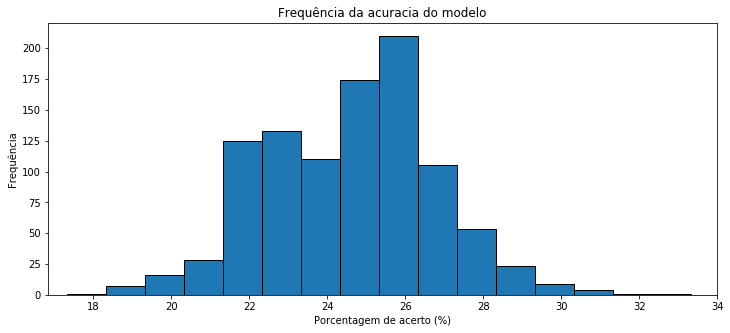

In [87]:
faixa=np.arange(min(acuracia_lista) - 1,max(acuracia_lista) + 1,1)
plt.figure(figsize=(12, 5))
plt.hist(acuracia_lista, bins=faixa, edgecolor='black', density=False)
plt.title('Frequência da acuracia do modelo')
plt.ylabel('Frequência')
plt.xlabel('Porcentagem de acerto (%)')
plt.xlim(min(acuracia_lista) - 0.5,max(acuracia_lista) + 1)
plt.show()

Após a implementação do modelo rodar 1000 vezes, obervamos uma grande dispersão na acurácia do mesmo. Isso se deve ao fato do caráter randômico ao dividir a base de dados, tendo dados de treinamento e teste na base de treinamento, fazendo a acurácia do modelo variar. 

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nas notícias. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas caterogias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por caterogia (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

 [GitHub das aulas](https://github.com/Insper/CD22-1)
 
 
 [Vídeo explicativo -Teorema de Bayes](https://youtu.be/I643PqSrETM)
 


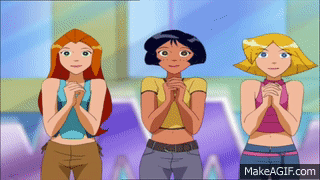